# Asteroid Impact Data
#### Brody Bowen

![alt text](https://cdn.images.express.co.uk/img/dynamic/galleries/x701/146248.jpg "Impact Imminent")

## Introduction

Like most people, you may enjoy daily life and your continued existence on this big, blue ball we call home. The dinosaurs probably felt the same way, but their luck ran out when an asteroid, as many scientists believe, came to Earth and wiped them all out. You might feel like that was so long ago and that nothing like that could happen to us nowadays, but how true is that? Lucky for you, you can dig deeper with this tutorial where we will be sending a dataset containing information on asteroids with collision potential through the data science pipleine in order try and discover trends among these asteroids as well as the type of asteroids that have higher collision chances with Earth. 

## Loading Our Data

The first step in analysing a dataset is actually loading the dataset into a variable so we can view its contents and manipulate it. Go to the page at https://www.kaggle.com/nasa/asteroid-impacts/data and click the download button which will download the impacts.csv file. This "comma-separated values" file requires a bit of extra work for us to be able to extract the data. In order to use this file, first you'll need to copy it into the same folder as the one your notebook is in, and then you'll need to import the pandas python library in order to turn the csv into a dataframe. To learn more about the Pandas libarary visit this link http://pandas.pydata.org. The following code below demonstrates this process.

In [1]:
import pandas as pd

#Loads our dataset from a comma separated values file
asteroids = pd.read_csv("impacts.csv")

#Prints out the first 5 asteroids
asteroids.head()

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0


Now that we've loaded in the data, we can see that each row is a different asteroid that has several columns that describe a certain feature about it. Now that we have the data loaded up, we can do some cleaning and manipulation of the data. 

## Data Processing

For our purposes in this tutorial, the last three columns of Cumulative Palermo Scale, Maximum Palermo Scale, and Maximum Torino Scale will not be needed in the analysis since we're analysing basic asteroid features.
So in order to make the dataset more compact and focused on what we want, we will remove these columns.

In [2]:
#Drops columns that we are not interested in for our analysis of the data
asteroids = asteroids.drop('Cumulative Palermo Scale',axis=1)
asteroids = asteroids.drop('Maximum Palermo Scale',axis=1)
asteroids = asteroids.drop('Maximum Torino Scale',axis=1)

The next part of our cleaning will be to modify several of the column names so that they are more clear in what they are describing. Specifically the two columns Asteroid Velocity and Cumulative Impact Probability. For Asteroid Velocity we want to rename it so that it matches Asteroid Diameter in the way that it shows how it is measured. In this case it means adding (km/s) to the column name because the velocity is measured in kilometers per second.

In [3]:
#Renames the column to add a bit of clarity and consistency to the values
asteroids = asteroids.rename(columns={'Asteroid Velocity': 'Asteroid Velocity (km/s)'})

For the second column of interest, Cumulative Impact Probability, we are going to change it to measure percent rather than probability. That is to say we are going to change values such as 0.01 to represent 1%. The first step to doing this is changing the name to show what it is measuring. 

In [4]:
#Renames the column to add a bit of clarity and consistency to the values
asteroids = asteroids.rename(columns={'Cumulative Impact Probability': 'Cumulative Impact Probability (percentage)'})

The second step will be slightly different than the cleaning we've been doing, as we will directly manipulate the data to show what we want. Now that we have changed the name to show we are talking about percentage, we have to change the data to match that. We'll do this by multiplying every value in this column by 100 in order to turn them into a percentage version of themselves.

In [5]:
#Adjusts probabilities to be in percentage
asteroids['Cumulative Impact Probability (percentage)'] = asteroids['Cumulative Impact Probability (percentage)'] * 100
asteroids.head()

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability (percentage),Asteroid Velocity (km/s),Asteroid Magnitude,Asteroid Diameter (km)
0,2006 WP1,2017,2017,1,5.200000e-07,17.77,28.3,0.007
1,2013 YB,2017,2046,23,7.600000e-03,8.98,31.4,0.002
2,2008 US,2017,2062,30,1.600000e-03,18.33,31.4,0.002
3,2010 VR139,2017,2076,24,2.000000e-05,4.99,26.7,0.016
4,2015 ME131,2017,2096,85,2.300000e-06,19.46,19.2,0.497


Now we're almost done processing this dataframe, and the last thing we want to do is add some additional columns that may give us further insight on the data that we will get through manipulation of already existing columns. The new columns will be Period Length, which will be obtained by subtracting period start from period end, and Average Possible Impacts Per Year, which is the result from dividing the total number of possible impacts by the period length. To avoid divide by zero errors, any asteroid that has a period end and period start with the same year will have a 1 rather than a 0 for the Period Length column.

In [6]:
#Adds new columns for Period Length (years) and Average Possible Impacts Per Year
asteroids.insert(3, 'Period Length (years)', 0, allow_duplicates=False)
asteroids.insert(5, 'Average Possible Impacts Per Year', 0.0, allow_duplicates=False)

#Assigns values to Period Length (years) column by subtracting the period start year from the period end year
asteroids['Period Length (years)'] = asteroids['Period End'] - asteroids['Period Start']

#Any asteroids where the period length was 0, will have their period length changed to 1 for math purposes 
mask = asteroids['Period Length (years)'] == 0 
column_name = 'Period Length (years)'
asteroids.loc[mask, column_name] = 1

#Assigns values to Possible Impacts Per Year column by dividing the Period Length by Possible Impacts
asteroids['Average Possible Impacts Per Year'] = asteroids['Possible Impacts']/asteroids['Period Length (years)']

#Prints out the first 5 asteroids to see our changes
asteroids.head()

,Object Name,Period Start,Period End,Period Length (years),Possible Impacts,Average Possible Impacts Per Year,Cumulative Impact Probability (percentage),Asteroid Velocity (km/s),Asteroid Magnitude,Asteroid Diameter (km)
0,2006 WP1,2017,2017,1,1,1.000000,5.200000e-07,17.77,28.3,0.007
1,2013 YB,2017,2046,29,23,0.793103,7.600000e-03,8.98,31.4,0.002
2,2008 US,2017,2062,45,30,0.666667,1.600000e-03,18.33,31.4,0.002
3,2010 VR139,2017,2076,59,24,0.406780,2.000000e-05,4.99,26.7,0.016
4,2015 ME131,2017,2096,79,85,1.075949,2.300000e-06,19.46,19.2,0.497


## Data Analysis

With our dataframe being fully processed, we are now ready to begin the data analysis section. We will attempt to uncover some not so obvious trends and maybe find attributes of an asteroid that increase its impact probability. Let's begin by extracting a few numbers from the data, starting with the number you are probably most interested in, the mean cumulative impact probability.

In [7]:
#Prints data for cumulative impact probability
print("The mean cumulative impact probability among all the asteroids is: " +\
      str(asteroids['Cumulative Impact Probability (percentage)'].mean()) + "%")
print("The standard deviation of cumulative impact probability among all the asteroids is: " +\
      str(asteroids['Cumulative Impact Probability (percentage)'].std()) + "%")

The mean cumulative impact probability among all the asteroids is: 0.0153947565417%
The standard deviation of cumulative impact probability among all the asteroids is: 0.251960708685%


So on average the chance an asteroid will impact with Earth is just over 1/100th of a percent. As much as we'd like the average probability to be 0%, these are still favorable odds for us. Let's sort the data by impact probability to see what some of the asteroids with top chances to hit us are like.

In [8]:
#Sorts the asteroids dataset by cumulative impact probability descending 
asteroids_sorted = asteroids.sort_values(by=['Cumulative Impact Probability (percentage)'], ascending=False)
asteroids_sorted.head(10)

,Object Name,Period Start,Period End,Period Length (years),Possible Impacts,Average Possible Impacts Per Year,Cumulative Impact Probability (percentage),Asteroid Velocity (km/s),Asteroid Magnitude,Asteroid Diameter (km)
568,2010 RF12,2095,2115,20,52,2.600000,6.50,5.10,28.4,0.007
424,2006 JY26,2073,2110,37,48,1.297297,0.97,2.98,28.4,0.007
386,2000 SG344,2069,2113,44,104,2.363636,0.22,1.36,24.8,0.037
285,2012 HG2,2053,2116,63,318,5.047619,0.20,3.32,27.0,0.014
274,2016 RD34,2051,2093,42,25,0.595238,0.19,1.14,27.5,0.011
218,2015 YJ,2042,2115,73,52,0.712329,0.18,16.35,28.3,0.007
681,410777 (2009 FD),2185,2198,13,7,0.538462,0.16,15.87,22.1,0.160
409,2016 VB1,2071,2115,44,73,1.659091,0.12,5.45,28.6,0.006
388,2014 JR24,2069,2115,46,38,0.826087,0.12,3.72,29.3,0.005
228,2011 AM37,2044,2114,70,120,1.714286,0.10,3.65,29.7,0.004


Wow! That's some variation for just the top 10 highest impact probabilities. Since the probabilities decrease at a rapid rate from the top, going from 6.5% all the way down to 0.1% within the span of 10 asteroids, we may want to pay special attention to how the properties of how the top 10 impact probability asteroids compare to the properties of all the rest of the asteroids. This might allow us to discern which properties are more important when determining if an asteroid will have a higher impact probability. 


We'll first look at data for the inherent properties of the asteroids, velocity, magnitude, and diameter.

In [9]:
#Prints velocity data
print("Mean Velocity of All Asteroids: " + str(asteroids['Asteroid Velocity (km/s)'].mean()))
print("Standard Deviation for Velocity of All Asteroids: " + str(asteroids['Asteroid Velocity (km/s)'].std()))
print("Mean Velocity of Top 10 Highest Impact Probability Asteroids: " +\
      str(asteroids_sorted.head(10)['Asteroid Velocity (km/s)'].mean()) + "\n")

#Prints magnitude data
print("Mean Magnitude of All Asteroids: " + str(asteroids['Asteroid Magnitude'].mean()))
print("Standard Deviation for Velocity of All Asteroids: " + str(asteroids['Asteroid Magnitude'].std()))
print("Mean Magnitude of Top 10 Highest Impact Probability Asteroids: " +\
      str(asteroids_sorted.head(10)['Asteroid Magnitude'].mean()) + "\n")

#Prints diameter data
print("Mean Diameter of All Asteroids: " + str(asteroids['Asteroid Diameter (km)'].mean()))
print("Standard Deviation for Diameter of All Asteroids: " + str(asteroids['Asteroid Diameter (km)'].std()))
print("Mean Diameter of Top 10 Highest Impact Probability Asteroids: " +\
      str(asteroids_sorted.head(10)['Asteroid Diameter (km)'].mean()) + "\n")

Mean Velocity of All Asteroids: 11.4625768668
Standard Deviation for Velocity of All Asteroids: 6.06777221274
Mean Velocity of Top 10 Highest Impact Probability Asteroids: 5.894

Mean Magnitude of All Asteroids: 26.158272328
Standard Deviation for Velocity of All Asteroids: 2.3882964767
Mean Magnitude of Top 10 Highest Impact Probability Asteroids: 27.41

Mean Diameter of All Asteroids: 0.0493777452416
Standard Deviation for Diameter of All Asteroids: 0.156402783563
Mean Diameter of Top 10 Highest Impact Probability Asteroids: 0.0258



So we see here for velocity, magnitude, and diameter the mean for all asteroids, the standard deviation for all asteroids, and the mean for the top 10 highest impact probability asteroids. The standard deviation for each value shows the level of variation in that value among all asteroids, and for each of the three categories the mean for the top 10 is within 1 standard deviation of the mean for all asteroids. This may indicate a lack of predictive power for these attributes, but we don't know for sure yet. We can see that the velocity and magnitude are much closer to breaking out of the 1 standard deviation range than diameter so we'll keep an eye on them for now. 

Next let's try analyzing the numbers behind the values we created and added to the data, period length and average possible impacts per year.

In [10]:
#Prints out data for period length
print("Mean Period Length of All Asteroids: " + str(asteroids['Period Length (years)'].mean()))
print("Standard Deviation for Period Length of All Asteroids: " + str(asteroids['Period Length (years)'].std()))
print("Mean Period Length of Top 10 Highest Impact Probability Asteroids: " +\
      str(asteroids_sorted.head(10)['Period Length (years)'].mean()) + "\n")

#Prints out data for average possible impacts per year
print("Mean Average Possible Impacts Per Year of All Asteroids: " +\
      str(asteroids['Average Possible Impacts Per Year'].mean()))
print("Standard Deviation for Average Possible Impacts Per Year of All Asteroids: " +\
      str(asteroids['Average Possible Impacts Per Year'].std()))
print("Mean Average Possible Impacts Per Year of Top 10 Highest Impact Probability Asteroids: " +\
      str(asteroids_sorted.head(10)['Average Possible Impacts Per Year'].mean()) + "\n")

Mean Period Length of All Asteroids: 37.3250366032
Standard Deviation for Period Length of All Asteroids: 32.6863671142
Mean Period Length of Top 10 Highest Impact Probability Asteroids: 45.2

Mean Average Possible Impacts Per Year of All Asteroids: 0.94124458777
Standard Deviation for Average Possible Impacts Per Year of All Asteroids: 1.31061088093
Mean Average Possible Impacts Per Year of Top 10 Highest Impact Probability Asteroids: 1.73540446893



Again, the means of the top 10 impact probability asteroids don't go further than 1 standard deviation from the mean, with neither of them really coming close. While we can't discount them yet as predictors for impact probability, we will go further assuming that there is a good chance they are not. The reason none of what we've learned is conclusive yet is because there are still different types of analysis left that can shed new light or further confirm our suspicions, next of which is data visualization. 

Visualizing data as graphs is an effective way to help give some context to the data rather than just overloading the brain with numbers. We will start our visualization in the same way as our numbers analysis, with the innate qualities of the asteroids, but before we begin it's important to establish one thing first. As shown in the earlier sorted dataset, the higher impact probabilities are close to outliers. To show this, here is the disparity between the amount of asteroids with a greater than 0.1% chance to impact and the amount of asteroids with less than or equal to 0.1% chance.

In [11]:
#Prints out size difference between the two sets of asteroids
print("The number of asteroids with a cumulative impact probability less than or equal to 0.1%: " +\
      str(len(asteroids[asteroids['Cumulative Impact Probability (percentage)'] <= 0.1])))
print("The number of asteroids with a cumulative impact probability greater than 0.1%: " +\
      str(len(asteroids[asteroids['Cumulative Impact Probability (percentage)'] > 0.1])))

The number of asteroids with a cumulative impact probability less than or equal to 0.1%: 674
The number of asteroids with a cumulative impact probability greater than 0.1%: 9


As you can see, a vast majority of asteroids fall below this cutoff. In order for the graphs to have any viewability, we will change the axises of the graph to only go up to 0.1% for cumulative impact probability because if we did not the size of the impact probability axis would be skewed upwards and a majority of the plotted dots would be compacted and undiscernable at the bottom of the graph. With this point explained, we will begin the visualization of the first three categories. We will do this by importing the matplotlib library which is used for generating visualizations for plots and the numpy library which we will use for its polyfit function. For more information on numpy.polyfit look here https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html and for more information about matlotlib's pyplot library look here https://matplotlib.org/api/pyplot_api.html    

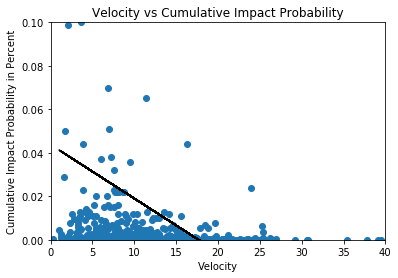

In [12]:
import matplotlib.pyplot as plt
import numpy as np

#Velocity plotted against cumulative impact probability 
plt.axis([0, 40, 0, 0.1])
plt.scatter(asteroids['Asteroid Velocity (km/s)'], asteroids['Cumulative Impact Probability (percentage)'])

#Fits the data to produce the line on the graph
m,b = np.polyfit(asteroids['Asteroid Velocity (km/s)'], asteroids['Cumulative Impact Probability (percentage)'], 1)
plt.plot(asteroids['Asteroid Velocity (km/s)'],m*asteroids['Asteroid Velocity (km/s)'] + b,'-', color='black')

#Configures title and labels
plt.title('Velocity vs Cumulative Impact Probability')
plt.ylabel('Cumulative Impact Probability in Percent')
plt.xlabel('Velocity')
plt.show()

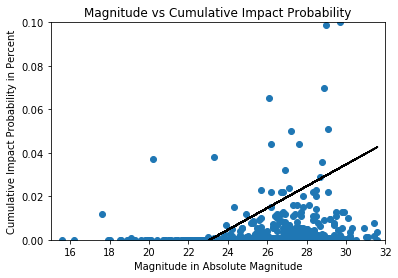

In [13]:
#Magnitude plotted against cumulative impact probability 
plt.axis([15, 32, 0, 0.1])
plt.scatter(asteroids['Asteroid Magnitude'], asteroids['Cumulative Impact Probability (percentage)'])

#Fits the data to produce the line on the graph
m,b = np.polyfit(asteroids['Asteroid Magnitude'], asteroids['Cumulative Impact Probability (percentage)'], 1)
plt.plot(asteroids['Asteroid Magnitude'],m*asteroids['Asteroid Magnitude'] + b,'-', color='black')

#Configures title and labels
plt.title('Magnitude vs Cumulative Impact Probability')
plt.ylabel('Cumulative Impact Probability in Percent')
plt.xlabel('Magnitude in Absolute Magnitude')
plt.show()

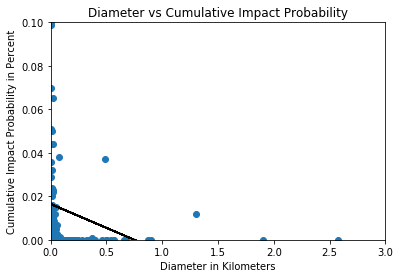

In [14]:
#Diameter plotted against cumulative impact probability 
plt.axis([0, 3, 0, 0.1])
plt.scatter(asteroids['Asteroid Diameter (km)'], asteroids['Cumulative Impact Probability (percentage)'])

#Fits the data to produce the line on the graph
m,b = np.polyfit(asteroids['Asteroid Diameter (km)'], asteroids['Cumulative Impact Probability (percentage)'], 1)
plt.plot(asteroids['Asteroid Diameter (km)'],m*asteroids['Asteroid Diameter (km)'] + b,'-', color='black')

#Configures title and labels
plt.title('Diameter vs Cumulative Impact Probability')
plt.ylabel('Cumulative Impact Probability in Percent')
plt.xlabel('Diameter in Kilometers')
plt.show()

These graphs go along with what we saw in the numbers section, in that both velocity and magnitude have an ok correlation when plotted against impact probability compared to the much weaker correlation that diameter has. According to the graphs, impact probability is negatively correlated with velocity and positively correlated with magnitude, meaning that as velocity goes down and magnitude goes up, impact probability increases. Though magnitude itself is a measure of absolute brightness, which you wouldn't think of as a factor affecting impact probability, an asterioid's magnitude is greatly influenced by the material it is made of which could play a part in things like mass which may be the hidden property increasing impact probability. We will investigate the effects of velocity and magnitude after we finish graphing the columns of the dataset we created.

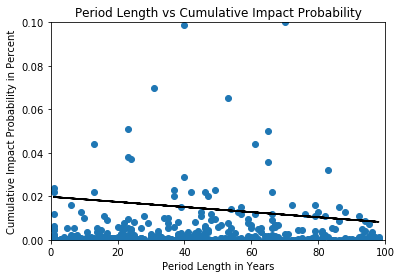

In [15]:
#Period Length in years plotted against cumulative impact probability 
plt.axis([0, 100, 0, 0.1])
plt.scatter(asteroids['Period Length (years)'], asteroids['Cumulative Impact Probability (percentage)'])

#Fits the data to produce the line on the graph
m,b = np.polyfit(asteroids['Period Length (years)'], asteroids['Cumulative Impact Probability (percentage)'], 1)
plt.plot(asteroids['Period Length (years)'],m*asteroids['Period Length (years)'] + b,'-', color='black')

#Configures title and labels
plt.title('Period Length vs Cumulative Impact Probability')
plt.ylabel('Cumulative Impact Probability in Percent')
plt.xlabel('Period Length in Years')
plt.show()

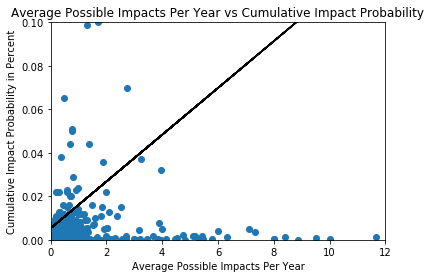

In [16]:
#Average Possible Impacts Per Year plotted against cumulative impact probability 
plt.axis([0, 12, 0, 0.1])
plt.scatter(asteroids['Average Possible Impacts Per Year'], asteroids['Cumulative Impact Probability (percentage)'])

#Fits the data to produce the line on the graph
m,b = np.polyfit(asteroids['Average Possible Impacts Per Year'], asteroids['Cumulative Impact Probability (percentage)'], 1)
plt.plot(asteroids['Average Possible Impacts Per Year'],m*asteroids['Average Possible Impacts Per Year'] + b,'-', color='black')

#Configures title and labels
plt.title('Average Possible Impacts Per Year vs Cumulative Impact Probability')
plt.ylabel('Cumulative Impact Probability in Percent')
plt.xlabel('Average Possible Impacts Per Year')
plt.show()

With these two graphs we see the benefit of our data processing section, because had we not calculated period length and used it to find average possible impacts per year we would not have found this stronger correlation between possible impacts per year and impact probability. Alone and without the added information of total possible impacts, the period length has a near non existant correlation with impact probability, which goes to show that data analysis is all about looking at things from different perspectives to gain new understandings. 

## Statistical Analysis

Through our visualizations we learned that there is a potential connection between velocity and magnitude that may help predict impact probability. What this is called when two or more terms interact is an "Interaction Term". To test our interaction term of velocity and magnitude, we will use statsmodels to perform an "Ordinary Least Squares" statistical regression on our data to see the term's predictive power when it comes to impact probability. To learn more about statsmodels direct your attention here http://www.statsmodels.org/stable/index.html.

In [17]:
import statsmodels.formula.api as smf

#OLS did not allow for the formatting we had on our column names, so they were changed to conform to what 
#would work
asteroids = asteroids.rename(columns={'Asteroid Magnitude': 'Magnitude'})
asteroids = asteroids.rename(columns={'Asteroid Velocity (km/s)': 'Velocity'})
asteroids = asteroids.rename(columns={'Cumulative Impact Probability (percentage)': 'Probability'})

#Uses OLS to create an interaction term between Magnitude and Velocity
regression = smf.ols(formula='Probability ~ Velocity * Magnitude', data=asteroids).fit()
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:            Probability   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.629
Date:                Fri, 15 Dec 2017   Prob (F-statistic):              0.181
Time:                        18:36:44   Log-Likelihood:                -24.682
No. Observations:                 683   AIC:                             57.36
Df Residuals:                     679   BIC:                             75.47
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.3243      0

In this type of regression analysis, we start with a null hypothesis that we want to reject, which in this case is that velocity and magnitude do not have any predicive power of impact probability. A good way to try to reject the null hypothesis is to look at the R-squared value. The closer to 1 that the R-squared value is, the more confident we are in rejecting the null hypothesis. Unfortunately in our case the R-squared value is very close to 0, meaning we don't have enough evidence to reject the null hypothesis. If you want to know more about R-squared testing check this link http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit. Don't let it get to you though, this happens all the time in statistics and the best way to handle it is to go out on your own and find new data that you can test with a fresh idea.

## Conclusion

Even though we were unable to find good predictors for asteroid impact proability from the information in this dataset, we did learn that a vast majority of asteroids are a fraction of a single percent likely to collide with Earth. 
We also learned about some interesting possible trends such as higher asteroid impact probabilities indicating a higher amount of potential impact chances.

It may well be the case that asteroid impact probability with Earth is mostly dominated by random chance, but through continued use of data science principles we may be able to find some underlying factors that would improve our understanding of this interesting subject. Hopefully this tutorial has taught you enough that you can go on to conduct your own investigations in the future!

## References

Asteroids Dataset: https://www.kaggle.com/nasa/asteroid-impacts/data

Pandas: http://pandas.pydata.org

Polyfit: https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html

Matplotlib Pyplot: https://matplotlib.org/api/pyplot_api.html

R-squared information: http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit

Statsmodels: http://www.statsmodels.org/stable/index.html

Image source: https://www.express.co.uk/news/science/891328/asteroid-phaethon-orbit-geminid-meteor-shower-watch-greek-god-nasa